In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

from nonlinear_utils import *

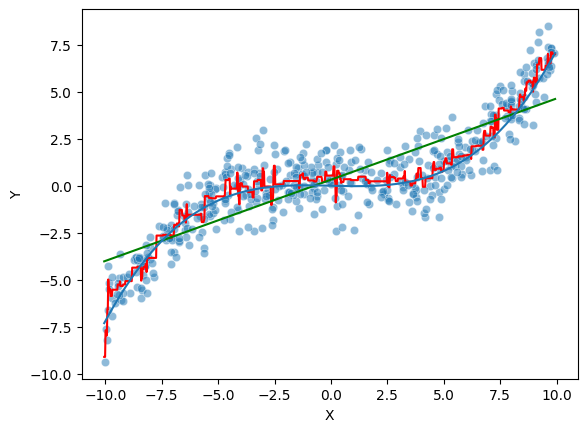

In [2]:
rng = np.random.default_rng(seed = 123)
data = nonlinear_generator()

g = GradientBoostingRegressor().fit(data[['X']].to_numpy(), data['Y'].to_numpy())
reg = LinearRegression().fit(data[['X']].to_numpy(), data['Y'].to_numpy())

xgrid = np.linspace(
    start = np.min(data['X'])-0.05,
    stop = np.max(data['X']+0.05),
    num=1000).reshape(-1,1)

gpreds = g.predict(xgrid)
rpreds = reg.predict(xgrid)

sns.scatterplot(x=data['X'], y=data['Y'], alpha=0.5)
plt.plot(xgrid, gpreds, color='red')
plt.plot(xgrid, rpreds, color='green')
plt.plot(xgrid, 0.75*(xgrid**2/20-0.2)*(xgrid/5))

In [3]:
reg = smf.ols(
    "Y ~ T",
    data = data
).fit(cov_type='HC2')
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
No. Observations:                 500   F-statistic:                     8.990
Covariance Type:                  HC2   Prob (F-statistic):            0.00285
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0665      0.191     -0.348      0.728      -0.441       0.308
T              0.7846      0.262      2.998      0.003       0.272       1.297
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [4]:
reg = smf.ols(
    "Y ~ T + X + X_centered:T",
    data = data
).fit(cov_type='HC2')
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
No. Observations:                 500   F-statistic:                     382.1
Covariance Type:                  HC2   Prob (F-statistic):          1.63e-128
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0078      0.102      0.076      0.939      -0.193       0.208
T                0.6030      0.138      4.384      0.000       0.333       0.873
X                0.4265      0.019     22.099      0.000       0.389       0.464
X_centered:T     0.0069      0.026      0.263      0.792      -0.044       0.058
================================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [5]:
final = mlrate_df(
    data = data,
    model = GradientBoostingRegressor()
)
reg = smf.ols(
    "Y ~ T + G + T:G_centered",
    data = final
).fit(cov_type="HC2")
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
No. Observations:                 500   F-statistic:                     1128.
Covariance Type:                  HC2   Prob (F-statistic):          4.64e-221
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2702      0.074     -3.639      0.000      -0.416      -0.125
T                0.4568      0.102      4.464      0.000       0.256       0.657
G                0.9763      0.025     38.824      0.000       0.927       1.026
T:G_centered     0.0062      0.034      0.180      0.857      -0.061       0.074
================================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

<AxesSubplot:xlabel='Estimate', ylabel='Density'>

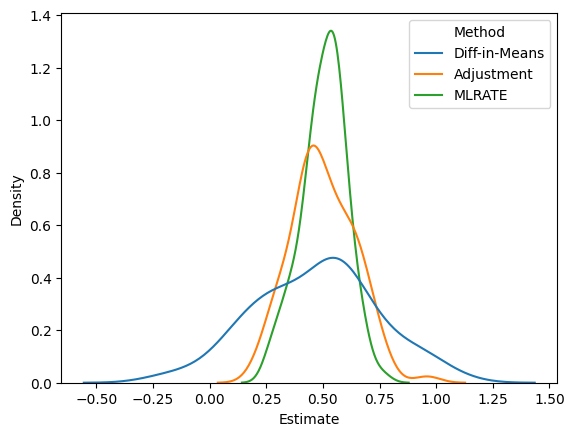

In [9]:
sim_res = nonlinear_variance_sim()
sns.kdeplot(x='Estimate', hue = 'Method', data=sim_res)